<a href="https://colab.research.google.com/github/jansoe/Lehre/blob/main/TestExamwtSolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task 1
**(3 points, easy)**

The `randint(a,b)` function from the `random` module gives one random number between a and b including both end points  

In [11]:
import random
random.randint(0, 10)

5

Write a function `create_random_int_list(max_value, num_entries)` that creates a list of length `num_entries`, such that each value is between 0 and max_value.

Example:
```
create_random_int_list(5, 4)

[0, 5, 2, 3]
```

In [15]:
def create_random_int_list(max_value, num_entries):
    random_number_list = []
    for i in range(num_entries):
        rand_int = random.randint(0, max_value)
        random_number_list.append(rand_int)
    return random_number_list

create_random_int_list(5, 4)

[3, 4, 2, 2]

## Task 2
**(5 points, medium)**

The goal of this task is to create a Python function named `clear_list_of(list_to_clear, multiples_of)`.
Your function should return a new list that only contains the elements from `list_to_clear` which are **not** divisible by any number in the `multiples_of set`.

Example:
```
test_list = [4,1,3,21,35,5,7]
multiples_of = {2,7}
clear_list_of(list_to_clear, multiples_of)

[1,3,5]
```

In [18]:
def clear_list_of(list_to_clear, remove_multiples_of):
    list_without_multiples = []
    for element in list_to_clear:
        remove_element = False
        for multiple in remove_multiples_of:
            if element % multiple == 0:
                remove_element = True
        if not(remove_element):
            list_without_multiples.append(element)
    return list_without_multiples

In [19]:
test_list = [4,2,3,21,5,27,11]
multiples_of = {2,7}
clear_list_of(test_list, multiples_of)

[3, 5, 27, 11]

### Task 3
**(2 points, easy)**

You are given a numpy array x. Write some code that removes all elements from the array which are not divisible by 2. Do not write a loop but use effective numpy computation.

Examples:
```
x = np.arange(0,20,3)

For this x your code should give:
array([0, 6, 12, 18])
```

In [20]:
x = np.arange(0,20,3)

In [22]:
x[x%2==0]

array([ 0,  6, 12, 18])

### Task 4
**(5 points, medium)**

Now rewrite the function using effective computation in numpy. To this end you are not provided with a `list_to_clear`, but with a numpy `array_to_clear`:

Example:
```
test_array = np.array([4,1,3,21,35,5,7])
multiples_of = {2,7}
clear_array_of(array_to_clear, multiples_of)

array([1,3,5])
```

Implement your solution without writing a loop, but instead create a boolean `mask` that selects all elements from the original array which are not divisible by the `multiples_of`.

Hint: Create a seperate mask for each element in `multiples_of` and than combine this mask to the final one

In [25]:
import numpy as np

def clear_array_of(array_to_clear, remove_multiples_of):
    mask = np.ones_like(array_to_clear).astype('bool')
    for multiple in remove_multiples_of:
        not_divisible = (array_to_clear % multiple) != 0
        mask = mask & not_divisible
    return array_to_clear[mask]

In [26]:
test_array = np.array([4,1,3,21,35,5,7])
multiples_of = {2,7}
clear_array_of(test_array, multiples_of)

array([1, 3, 5])

## Task 5
**(7 points, medium)**

You are provided with a function `first_last_letter(word)` that returns a tuple with the first and last letter from the word.

In [27]:
def first_last_letter(word):
    word = word.strip()
    first = word[0]
    last = word[-1]
    return first, last

You are also provided with some code that iterates through a text and word by word (removing punctuation and converting it to lower case). For demonstration purposes, each word is printed:

In [28]:
text = "This is just (some) text to test."

import re
for word in text.split():
    cleaned_word = re.sub(r'[^\w\s]', '', word).lower()
    print(cleaned_word)

this
is
just
some
text
to
test


Complete the function `start_end_occurence_difference(text)` that returns a dictionary which contains for each letter the difference in times of occurences at the beginning and at the end of the word of a letter. That is, in the example text, the letter `t` appears 4 times at the beginning and 3 times at the end of a word, so the value for `t` should be 1 as it appears once more often at the beginning.

Make use of the `first_last_letter` function!

Example:
```
start_end_occurence_difference(text)

{'t': 1, 's': -1, 'i': 1, 'j': 1, 'e': -1, 'o': -1}
```

In [29]:
def start_end_occurence_difference(text):
    diff_counter = {}
    for word in text.split():
        cleaned_word = re.sub(r'[^\w\s]', '', word).lower()
        start, end = first_last_letter(cleaned_word)
        if start not in diff_counter:
            diff_counter[start] = 0
        if end not in diff_counter:
            diff_counter[end] = 0
        diff_counter[start] += 1
        diff_counter[end] -= 1
    return diff_counter

In [30]:
start_end_occurence_difference(text)

{'t': 1, 's': -1, 'i': 1, 'j': 1, 'e': -1, 'o': -1}

## Task 6
**(15 points, easy)**

In this task, you will create a basic shopping system using Object-Oriented Programming (OOP) in Python. You need to create two classes: Product and ShoppingCart.

- **Product class**:

  - Attributes:
    - `name` (string)
    - `price` (float)
    - `quantity` (integer)

  - Methods:
    - `__init__(self, name, price, quantity)`: Initialize a new product.
    - `is_available(self, quantity)`: Check if at least the quantity of  product is available. If so, return `True`. Otherwise, return `False`.

- **ShoppingCart class**:

  - Attributes:
    - `products` (dictionary mapping Product instances to quantities).

  - Methods:
    - `__init__(self`): Initialize an empty shopping cart.
    - `add_product(self, product, quantity)`: Add a certain quantity of a product to the cart. If the product isn't available in the necessary quantity, print "Not enough {product.name} in stock."
    - `remove_product(self, product)`: Remove a product from the cart.
    - `checkout(self)`: Print out a list of all products in the cart along with their quantities, and the total cost. After printing, clear the cart.

Example:
```
apple = Product("Apple", 0.5, 10)
banana = Product("Banana", 0.3, 5)

cart = ShoppingCart()
cart.add_product(apple, 5)  # Adds 5 apples to the cart
cart.add_product(banana, 10)  # Prints "Not enough Banana in stock."
cart.add_product(banana, 4)  # Adds 4 bananas to the cart

cart.checkout()  
# Should print:
# Apple x5
# Banana x4
# Total cost: $4.7
# And clear the cart.
```

In [49]:
class Product:

    def __init__(self, name, price, quantity):
        self.name = name
        self.price = price
        self.quantity = quantity

    def is_available(self, quantity):
        return quantity <= self.quantity


class ShoppingCart:

    def __init__(self):
        self.products = {}

    def add_product(self, product, quantity):
        if product.is_available(quantity):
            if product not in self.products:
                self.products[product] = 0
            self.products[product] += quantity
        else:
            print(f"Not enough {product.name} in stock")

    def checkout(self):
        total = 0
        for product in self.products:
          quantity = self.products[product]
          print(product.name + ' x' + str(quantity))
          total += quantity * product.price
        print("Total cost: " + str(total) + "$")

In [48]:
apple = Product("Apple", 0.5, 10)
banana = Product("Banana", 0.3, 5)

cart = ShoppingCart()
cart.add_product(apple, 5)  # Adds 5 apples to the cart
cart.add_product(banana, 10)  # Prints "Not enough Banana in stock."
cart.add_product(banana, 4)  # Adds 4 bananas to the cart

cart.checkout()
# Should print:
# Apple x5
# Banana x4
# Total cost: $3.7
# And clear the cart.

Not enough Banana in stock
Apple x5
Banana x4
Total cost: 3.7$


## Task 7
**(5 points, easy)**

In this task, you will extend the shopping system you created earlier by adding a new class DiscountedProduct that inherits from the Product class. This class represents a product that is currently being sold at a discount.

Here are the details:

- DiscountedProduct class:

  - Attributes: Inherits name, price, and quantity from Product. Adds discount (float, representing the discount as a percentage. For example, a 20% discount would be represented as 0.2).

  - Methods:
    - `__init__(self, name, price, quantity, discount):` Initialize a new discounted product.
    - `get_discounted_price(self)`: Return the price of the product after the discount has been applied.

In [57]:
class DiscountedProduct(Product):

    def __init__(self, name, price, quantity, discount):
        super().__init__(name, price, quantity)
        self.discount = discount

    def get_discounted_price(self):
        return self.price * (1-self.discount)

In [59]:
banana = DiscountedProduct("Banana", 0.3, 5, 0.2)

## Task 8
**(8 points, medium-difficult)**

You are provided with the MNIST handwritten digit dataset and a simple untrained neural network.



In [60]:
import tensorflow as tf
import numpy as np

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images_flat = train_images.reshape((-1, 28*28))

print(train_images.shape)
print(train_images_flat.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000, 784)


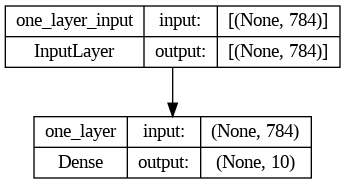

In [61]:
out_layer = tf.keras.layers.Dense(
    input_shape = (28*28,),
    units = 10,
    activation='softmax',
    name = 'one_layer'
)

model1 = tf.keras.models.Sequential()
model1.add(out_layer)

tf.keras.utils.plot_model(model1, show_shapes=True)

#### Actual Task
- Use the `predict`-method of the model to predict the outputs for the first 20 images from the training data.
- Use the function `np.argmax(array, axis)` that returns the index of the maximal value along the axis to find the output-neuron with the highest activity for each of the 20 images
- Now compare the predictions to the train_labels and calculate the fraction of correct predictions (accuracy)

In [62]:
prob = model1.predict(train_images_flat[:20])

1/1 [==============================] - 0s 294ms/step


In [63]:
pred = np.argmax(prob, 1)

In [64]:
(pred == train_labels[:20]).mean()

0.25